<h1>Introduction</h1>
This script demonstrates a complete pipeline for building, training, and evaluating a deep learning model using TensorFlow and Keras for image classification. The process involves setting up the environment to manage GPU memory, cleaning the dataset, loading and preprocessing the data, splitting the data into training, validation, and test sets, building a convolutional neural network (CNN), training the model, evaluating its performance, and finally saving the trained model for future use.

<h1>1) Install Dependencies and Setup</h1>

In [40]:
import tensorflow as tf

In [41]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [42]:
tf.config.list_physical_devices('GPU')

[]

<h1>2) Remove dodgy images</h1>

In [43]:
import cv2
#import imghdr
from PIL import Image
import matplotlib.pyplot as plt

In [44]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [45]:
import tensorflow as tf
import os

In [46]:
data_dir = 'data'

In [47]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [48]:
os.listdir(data_dir)

['happy', 'sad']

In [49]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image data\happy\1-2.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image data\happy\154006829.jpg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1902539.jpg
Issue with image data\happy\1902540.jpg
Issue with image data\happy\1902587.jpg
Issue with image data\happy\1920px-face-smile.svg_.png.jpg
Issue with image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image data\happy\60632274._UY200_.jpg
Issue with image data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image data\happy\7-principles-of-successful-and-happy-people.png
Issue with image data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg


<h1>3) Load Data</h1>

In [50]:
import numpy as np

In [51]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [52]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [53]:
data_iterator = data.as_numpy_iterator()

In [54]:
batch = data_iterator.next()

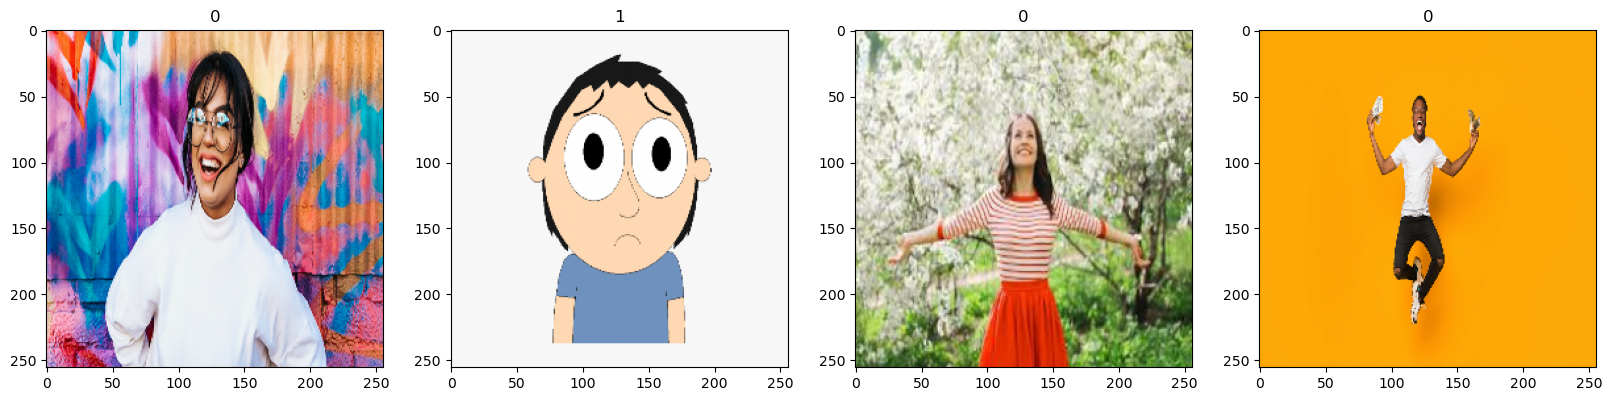

In [55]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<h1>4) Scale Data</h1>

In [56]:
data = data.map(lambda x,y: (x/255, y))

In [57]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607

<h1>5) Split Data</h1>

In [58]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [59]:
train_size

7

In [60]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

<h1>6) Build Deep Learning Model</h1>

In [61]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten

In [63]:
model = Sequential()

In [64]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

<h1>7) Train</h1>

In [67]:
logdir='logs'

In [68]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [69]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 812ms/step - accuracy: 0.5148 - loss: 1.0867 - val_accuracy: 0.8125 - val_loss: 0.6548
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 610ms/step - accuracy: 0.7711 - loss: 0.6340 - val_accuracy: 0.6406 - val_loss: 0.5828
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 613ms/step - accuracy: 0.7024 - loss: 0.5648 - val_accuracy: 0.7969 - val_loss: 0.4944
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 681ms/step - accuracy: 0.7954 - loss: 0.4671 - val_accuracy: 0.9062 - val_loss: 0.3814
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 612ms/step - accuracy: 0.7926 - loss: 0.4559 - val_accuracy: 0.8438 - val_loss: 0.3345
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 566ms/step - accuracy: 0.8665 - loss: 0.3692 - val_accuracy: 0.8594 - val_loss: 0.2541
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 627ms/step - accuracy: 0.8987 - loss: 0.2910 - val_accuracy: 0.9531 - val_loss: 0.2116
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 619ms/step - accuracy: 0.9269 - loss: 0.2179 - val_accuracy: 0.9375 - val_loss

<h1>8) Plot Performance</h1>

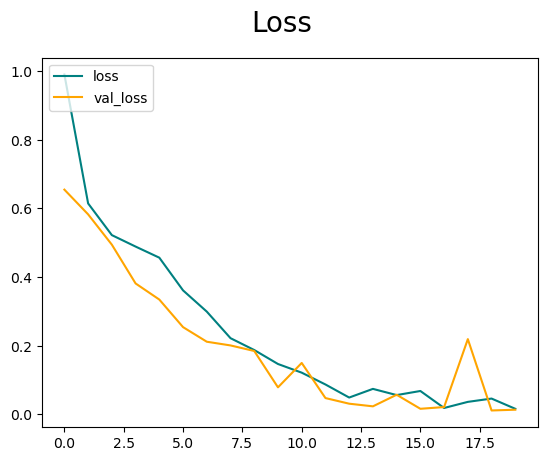

In [70]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

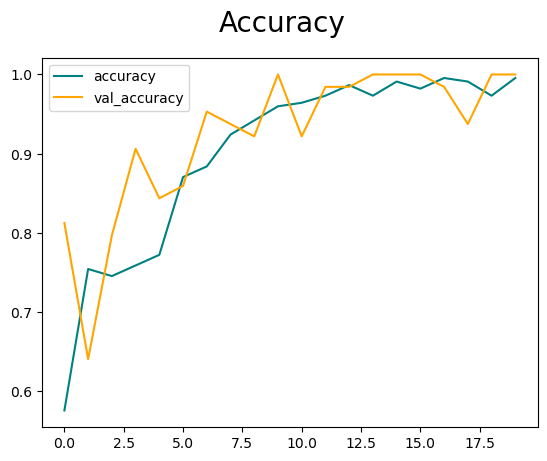

In [71]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<h1>9) Evaluate</h1>

In [72]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [73]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [74]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


In [75]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


<h1>10) Test</h1>

In [96]:
import cv2
import matplotlib.pyplot as plt

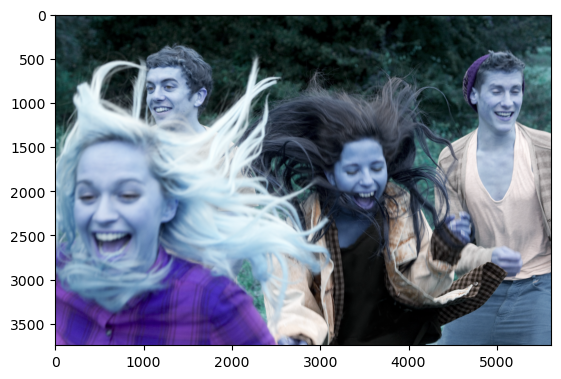

In [97]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

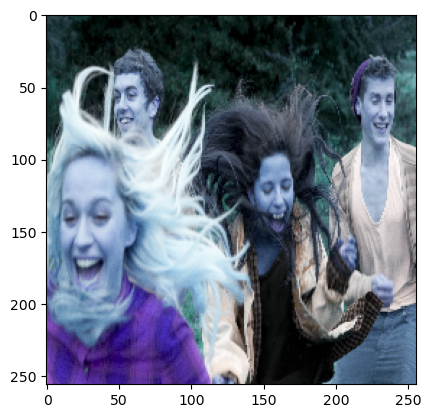

In [98]:
resize = tf.image.resize(img, (256,256))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(resize.numpy().astype(int))
plt.show()

In [99]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [100]:
yhat

array([[0.00742315]], dtype=float32)

In [101]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


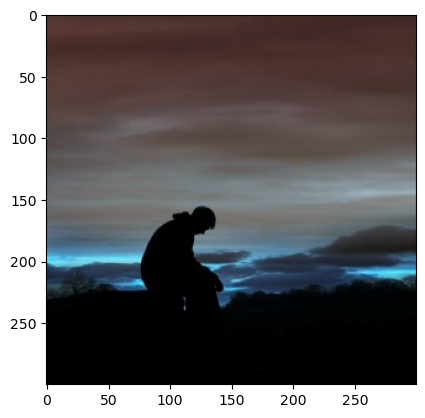

In [102]:
img = cv2.imread('2222222.jpg')
plt.imshow(img)
plt.show()

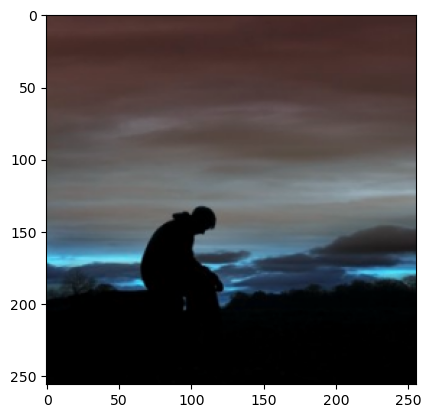

In [103]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [104]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [105]:
yhat

array([[0.99560744]], dtype=float32)

In [106]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


<h1> 11) Save the Model</h1>

In [110]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

In [111]:
# Create a directory for models if it does not exist
os.makedirs('models', exist_ok=True)

In [112]:
# Save the model in the .keras format
model.save(os.path.join('models', 'imageclassifier.keras'))

In [113]:
new_model = load_model(os.path.join('models', 'imageclassifier.keras'))

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [114]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([[0.99560744]], dtype=float32)

<h1>Conclusion</h1>
This comprehensive script guides you through the process of building an image classification model using TensorFlow and Keras. Starting from setting up the environment, cleaning the dataset, loading, preprocessing, and splitting the data, to building, training, and evaluating a CNN, this script encapsulates all necessary steps. Finally, it demonstrates how to save the trained model and reload it for making predictions on new data.